In [217]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression

In [218]:
data=pd.read_csv(r'C:\Users\Reem Yasser\Desktop\final project data\archive (2)\Electric_Vehicle_Population_Data.csv')
print('Data Description: \n', data.describe())

Data Description: 
          Postal Code     Model Year  Electric Range      Base MSRP   
count  124714.000000  124716.000000   124716.000000  124716.000000  \
mean    98163.826740    2019.406339       79.471936    1556.068909   
std      2550.122515       2.976174      100.331969   10053.289929   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       25.000000       0.000000   
75%     98370.000000    2022.000000      200.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         124419.000000    1.247160e+05       1.247140e+05  
mean              29.664481    2.040790e+08       5.297079e+10  
std               14.749518    8.882569e+07       1.652363e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000

In [219]:
data= data.dropna()
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10


In [220]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
x = np.array(x.values)
print()
print('x.shape = ', x.shape)
data.head()


x.shape =  (124038, 16)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10


In [221]:
print('Number of records:',data.shape[0])
print('Number of Features:',data.shape[1],'\n')

print('Columns:',data.columns)

Number of records: 124038
Number of Features: 17 

Columns: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [222]:
import re
# Convert the 'Vehicle Location' column to string type
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

data['latitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
data['longitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

data = data.dropna(subset=['latitude', 'longitude'])
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689


In [223]:
data.drop(axis=1,labels=["Vehicle Location"],inplace=True)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689


In [224]:
print(data.shape[1])

18


In [225]:
data['Location'] = data['County'] + ', ' + data['City'] + ', ' + data['State']
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude,Location
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA"
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA"
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA"


In [226]:
data.drop(axis=1,labels=["County"],inplace=True)
data.drop(axis=1,labels=["City"],inplace=True)
data.drop(axis=1,labels=["State"],inplace=True)
data.drop(axis=1,labels=["Postal Code"],inplace=True)

data.head()

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude,Location
0,5YJ3E1EB4L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
3,5YJXCBE21K,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
4,5UXKT0C5XH,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA"
5,1N4AZ0CP4F,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA"
6,5YJ3E1EBXJ,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA"


In [227]:
print('Number of Features: ',data.shape[1])

Number of Features:  15


In [228]:
def create_price_range_category(data, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    data['Price_Range_Category'] = data[column].apply(categorize_price)
    return data

data = create_price_range_category(data, column='Base MSRP')

In [229]:
def create_electric_range_category(data, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    data['Electric_Range_Category'] = data[column].apply(categorize_range)
    return data

data = create_electric_range_category(data, column='Electric Range')

In [230]:
display(data.head())

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,5YJ3E1EB4L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA",Unknown,Long
3,5YJXCBE21K,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA",Unknown,Medium
4,5UXKT0C5XH,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA",Unknown,Short
5,1N4AZ0CP4F,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA",Unknown,Short
6,5YJ3E1EBXJ,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA",Unknown,Medium


In [231]:
print('Number of records:',data.shape[0])
print('Number of Features:',data.shape[1],'\n')

print('Columns:',data.columns)

Number of records: 124038
Number of Features: 17 

Columns: Index(['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'latitude', 'longitude',
       'Location', 'Price_Range_Category', 'Electric_Range_Category'],
      dtype='object')


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance

# Load data

In [233]:
X = data[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
          'Base MSRP', 'Legislative District', 'Electric Utility', 'latitude', 'longitude']]

y = data['Electric Range']

# Convert categorical variables to numerical variables using Label Encoding

In [234]:
cat_features = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']

for feature in cat_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

C:\Users\Reem Yasser\AppData\Local\Temp\ipykernel_21284\3995574072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])
C:\Users\Reem Yasser\AppData\Local\Temp\ipykernel_21284\3995574072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])
C:\Users\Reem Yasser\AppData\Local\Temp\ipykernel_21284\3995574072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [235]:
print('Categorical Data: \n-----------------------------------------------------------------------------',data.head(2).T)
print('\nNumerical Data: \n--------------------------------------------------------------------------',X_train.head(2).T)

Categorical Data: 
-----------------------------------------------------------------------------                                                                                          0   
VIN (1-10)                                                                      5YJ3E1EB4L  \
Model Year                                                                            2020   
Make                                                                                 TESLA   
Model                                                                              MODEL 3   
Electric Vehicle Type                                       Battery Electric Vehicle (BEV)   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible   
Electric Range                                                                         322   
Base MSRP                                                                                0   
Legislative District                                     

# Split data & Feature selection

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FeatureSelection = SelectPercentile(score_func=f_classif, percentile=50)
X_train_selected = FeatureSelection.fit_transform(X_train, y_train)

X_test_selected = FeatureSelection.transform(X_test)

selected_features = X.columns[FeatureSelection.get_support()]
print('Selected features are:', list(selected_features))

Selected features are: ['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']


D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


# Graph showing the importnce of the selected features

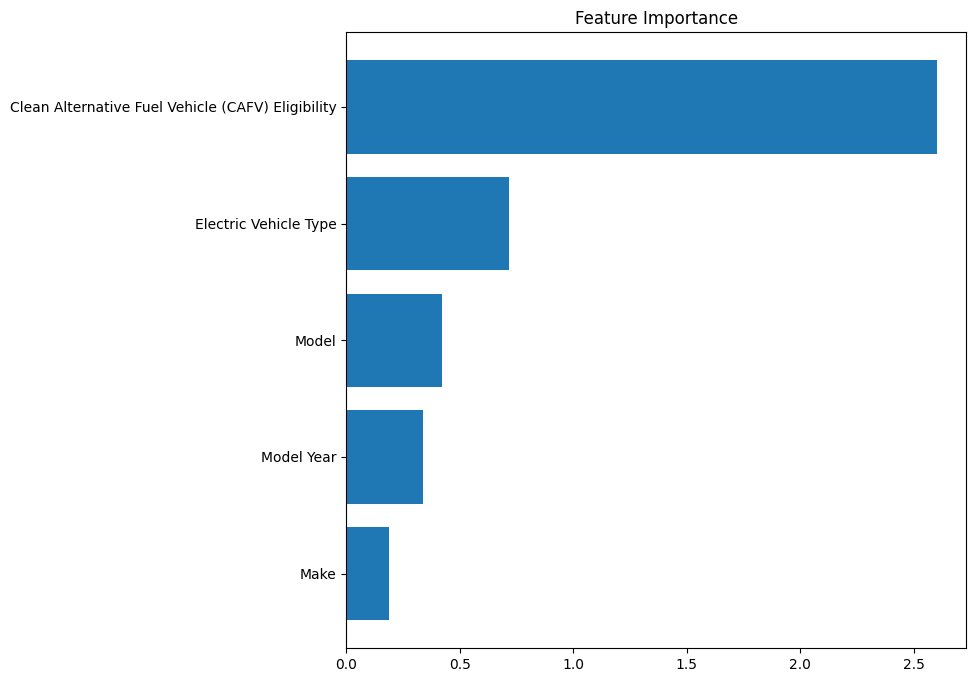

In [237]:
result = permutation_importance(GBRModel, X_test_selected, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(8, 8))

plt.barh(np.arange(sorted_idx.shape[0]) + .4, result.importances_mean[sorted_idx], align='center')
plt.yticks(np.arange(sorted_idx.shape[0]) + .4, X.columns[sorted_idx])

plt.title('Feature Importance')
plt.show()

# Predection algorthim using Gradient Boosting Regressor model

In [238]:
GBRModel = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=1.3, random_state=33)
GBRModel.fit(X_train_selected, y_train)

print('GBRModel Train Score is:', GBRModel.score(X_train_selected, y_train))
print('GBRModel Test Score is:', GBRModel.score(X_test_selected, y_test))
print('----------------------------------------------------')

y_pred = GBRModel.predict(X_test_selected)
print('Predicted Value for GBRModel is:',y_pred[:10])

GBRModel Train Score is: 0.9956735163610013
GBRModel Test Score is: 0.9958857632033287
----------------------------------------------------
Predicted Value for GBRModel is: [ 2.22664759e-01  1.50985887e+02  3.00326239e+02  2.09995003e+02
  2.14730726e+02  2.62460296e+01 -1.20838478e+00  7.41773217e+01
 -1.20838478e+00  2.42952290e+01]


# Grapg showing the learning rate of the algorthim 

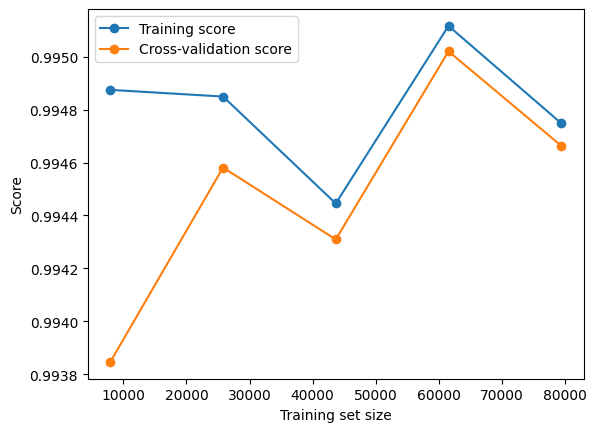

Predicted Value for GBRModel is: [ 2.22664759e-01  1.50985887e+02  3.00326239e+02  2.09995003e+02
  2.14730726e+02  2.62460296e+01 -1.20838478e+00  7.41773217e+01
 -1.20838478e+00  2.42952290e+01]


In [239]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(GBRModel, X_train_selected, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

y_pred = GBRModel.predict(X_test_selected)
print('Predicted Value for GBRModel is:', y_pred[:10])